# Conditional GAN MNIST NUMBERS DATASET

## Import and Preprocess the Dataset

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os

#### Check if GPU is available

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Load the MNIST dataset and preprocess

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

### Define the Generator Model

In [15]:
class Generator(nn.Module):
    def __init__(self, latent_dim, n_classes=10):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(n_classes, 10)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 10, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embedding = self.embedding(labels)
        noise_concat = torch.cat([noise, label_embedding], dim=1)
        img = self.model(noise_concat)
        return img.view(img.size(0), 1, 28, 28)

### Define the Discriminator Model

In [16]:
class Discriminator(nn.Module):
    def __init__(self, n_classes=10):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(n_classes, 10)
        self.model = nn.Sequential(
            nn.Linear(28 * 28 + 10, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.4),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        img = img.view(img.size(0), 28 * 28)
        label_embedding = self.embedding(labels)
        img_concat = torch.cat([img, label_embedding], dim=1)
        return self.model(img_concat)

### Initialize models, optimizers, and loss function

In [17]:
latent_dim = 100
generator = Generator(latent_dim=latent_dim).to(device)
discriminator = Discriminator().to(device)

optimizer_g = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.5, 0.999))

criterion = nn.BCELoss()

### Save the model after training

In [18]:
def save_model(generator, discriminator, epoch, path='models'):
    if not os.path.exists(path):
        os.makedirs(path)
    torch.save(generator.state_dict(), f'{path}/generator_epoch_{epoch}.pth')
    torch.save(discriminator.state_dict(), f'{path}/discriminator_epoch_{epoch}.pth')
    print(f'Models saved at epoch {epoch}.')




### Load the model for later use

In [19]:
def load_model(generator, discriminator, epoch, path='models'):
    generator.load_state_dict(torch.load(f'{path}/generator_epoch_{epoch}.pth'))
    discriminator.load_state_dict(torch.load(f'{path}/discriminator_epoch_{epoch}.pth'))
    print(f'Models loaded from epoch {epoch}.')

### Generating and saving images using the trained generator

In [20]:
def generate_and_save_images(generator, epoch, latent_dim, n_samples=10):
    generator.eval()
    noise = torch.randn(n_samples, latent_dim).to(device)
    labels = torch.randint(0, 10, (n_samples,)).to(device)
    with torch.no_grad():
        fake_images = generator(noise, labels).cpu()

    # Create a grid of generated images
    grid = make_grid(fake_images, nrow=5, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.savefig(f'generated_images_epoch_{epoch}.png')
    plt.show()

### Training loop

Epoch [1/150] | D Loss: 0.0478 | G Loss: 5.0525
Epoch [2/150] | D Loss: 0.0248 | G Loss: 5.5735
Epoch [3/150] | D Loss: 0.0864 | G Loss: 5.2034
Epoch [4/150] | D Loss: 0.0285 | G Loss: 6.9148
Epoch [5/150] | D Loss: 0.0521 | G Loss: 6.8257
Epoch [6/150] | D Loss: 0.0509 | G Loss: 6.3923
Epoch [7/150] | D Loss: 0.0534 | G Loss: 6.2472
Epoch [8/150] | D Loss: 0.0768 | G Loss: 6.8805
Epoch [9/150] | D Loss: 0.0483 | G Loss: 6.7376
Epoch [10/150] | D Loss: 0.1798 | G Loss: 5.1805
Epoch [11/150] | D Loss: 0.1465 | G Loss: 4.8058
Epoch [12/150] | D Loss: 2.4225 | G Loss: 1.5105
Epoch [13/150] | D Loss: 0.2202 | G Loss: 7.6602
Epoch [14/150] | D Loss: 0.1511 | G Loss: 5.2873
Epoch [15/150] | D Loss: 0.2240 | G Loss: 4.6557
Epoch [16/150] | D Loss: 0.3337 | G Loss: 4.4192
Epoch [17/150] | D Loss: 0.1081 | G Loss: 3.7737
Epoch [18/150] | D Loss: 0.3225 | G Loss: 5.1402
Epoch [19/150] | D Loss: 0.1848 | G Loss: 4.3331
Epoch [20/150] | D Loss: 0.2719 | G Loss: 2.9743
Epoch [21/150] | D Loss: 0.23

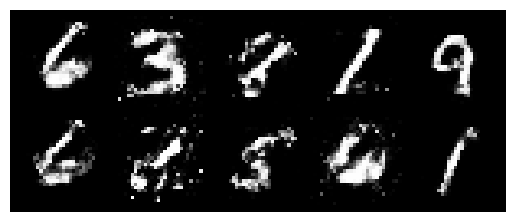

Epoch [31/150] | D Loss: 0.6300 | G Loss: 2.9056
Epoch [32/150] | D Loss: 0.7028 | G Loss: 2.5344
Epoch [33/150] | D Loss: 0.5449 | G Loss: 2.7671
Epoch [34/150] | D Loss: 0.6015 | G Loss: 2.5135
Epoch [35/150] | D Loss: 0.5470 | G Loss: 2.5868
Epoch [36/150] | D Loss: 0.6622 | G Loss: 2.6320
Epoch [37/150] | D Loss: 0.5586 | G Loss: 2.4383
Epoch [38/150] | D Loss: 0.6680 | G Loss: 1.7647
Epoch [39/150] | D Loss: 0.7083 | G Loss: 2.8278
Epoch [40/150] | D Loss: 0.5993 | G Loss: 2.6778
Epoch [41/150] | D Loss: 0.7247 | G Loss: 1.5546
Epoch [42/150] | D Loss: 0.8517 | G Loss: 2.6115
Epoch [43/150] | D Loss: 0.6638 | G Loss: 1.6932
Epoch [44/150] | D Loss: 0.6990 | G Loss: 1.8944
Epoch [45/150] | D Loss: 0.6923 | G Loss: 1.7520
Epoch [46/150] | D Loss: 0.6887 | G Loss: 2.0314
Epoch [47/150] | D Loss: 0.7446 | G Loss: 1.7039
Epoch [48/150] | D Loss: 0.6780 | G Loss: 1.7620
Epoch [49/150] | D Loss: 0.6780 | G Loss: 1.7349
Epoch [50/150] | D Loss: 0.6458 | G Loss: 1.6518
Epoch [51/150] | D L

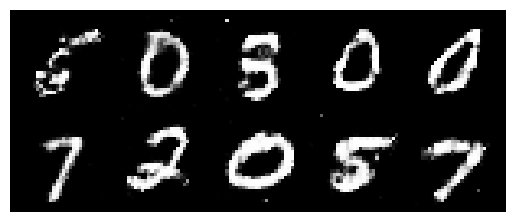

Epoch [61/150] | D Loss: 0.7714 | G Loss: 1.8018
Epoch [62/150] | D Loss: 0.7439 | G Loss: 1.8294
Epoch [63/150] | D Loss: 0.9104 | G Loss: 1.0322
Epoch [64/150] | D Loss: 0.8505 | G Loss: 1.5193
Epoch [65/150] | D Loss: 0.8494 | G Loss: 2.0650
Epoch [66/150] | D Loss: 0.8691 | G Loss: 1.4351
Epoch [67/150] | D Loss: 0.8630 | G Loss: 1.6597
Epoch [68/150] | D Loss: 0.9434 | G Loss: 1.9843
Epoch [69/150] | D Loss: 0.7763 | G Loss: 1.7470
Epoch [70/150] | D Loss: 0.9372 | G Loss: 1.3243
Epoch [71/150] | D Loss: 0.9033 | G Loss: 1.7232
Epoch [72/150] | D Loss: 0.9289 | G Loss: 1.4467
Epoch [73/150] | D Loss: 0.8803 | G Loss: 1.3088
Epoch [74/150] | D Loss: 0.9729 | G Loss: 1.4114
Epoch [75/150] | D Loss: 0.8797 | G Loss: 1.5230
Epoch [76/150] | D Loss: 0.9068 | G Loss: 1.2818
Epoch [77/150] | D Loss: 1.0016 | G Loss: 1.7954
Epoch [78/150] | D Loss: 0.9054 | G Loss: 1.4968
Epoch [79/150] | D Loss: 0.7949 | G Loss: 1.4720
Epoch [80/150] | D Loss: 0.8936 | G Loss: 1.4377
Epoch [81/150] | D L

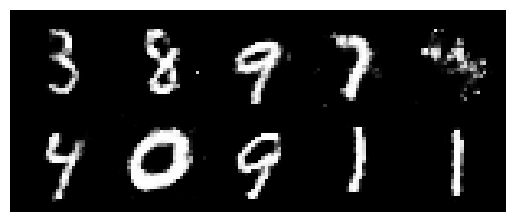

Epoch [91/150] | D Loss: 0.9430 | G Loss: 1.1885
Epoch [92/150] | D Loss: 0.8797 | G Loss: 1.1651
Epoch [93/150] | D Loss: 1.0561 | G Loss: 1.7815
Epoch [94/150] | D Loss: 0.9315 | G Loss: 1.4336
Epoch [95/150] | D Loss: 0.9679 | G Loss: 1.8073
Epoch [96/150] | D Loss: 0.8472 | G Loss: 1.5148
Epoch [97/150] | D Loss: 0.9381 | G Loss: 1.1641
Epoch [98/150] | D Loss: 0.9195 | G Loss: 1.6734
Epoch [99/150] | D Loss: 0.9668 | G Loss: 1.6745
Epoch [100/150] | D Loss: 0.9766 | G Loss: 1.5194
Epoch [101/150] | D Loss: 1.0616 | G Loss: 1.3170
Epoch [102/150] | D Loss: 1.0845 | G Loss: 0.9528
Epoch [103/150] | D Loss: 1.1139 | G Loss: 1.1382
Epoch [104/150] | D Loss: 1.0469 | G Loss: 1.3150
Epoch [105/150] | D Loss: 0.8772 | G Loss: 1.5137
Epoch [106/150] | D Loss: 1.0271 | G Loss: 1.8056
Epoch [107/150] | D Loss: 0.9823 | G Loss: 1.4929
Epoch [108/150] | D Loss: 0.9664 | G Loss: 1.5467
Epoch [109/150] | D Loss: 1.0630 | G Loss: 1.4387
Epoch [110/150] | D Loss: 0.9965 | G Loss: 1.2130
Epoch [11

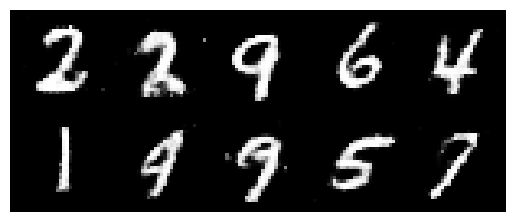

Epoch [121/150] | D Loss: 1.0770 | G Loss: 1.0400
Epoch [122/150] | D Loss: 0.9151 | G Loss: 1.5498
Epoch [123/150] | D Loss: 1.0642 | G Loss: 1.4053
Epoch [124/150] | D Loss: 0.8965 | G Loss: 0.9851
Epoch [125/150] | D Loss: 1.0790 | G Loss: 1.5582
Epoch [126/150] | D Loss: 0.9625 | G Loss: 1.2191
Epoch [127/150] | D Loss: 0.9569 | G Loss: 1.6175
Epoch [128/150] | D Loss: 0.9242 | G Loss: 1.3675
Epoch [129/150] | D Loss: 0.9621 | G Loss: 1.2571
Epoch [130/150] | D Loss: 1.0336 | G Loss: 1.0023
Epoch [131/150] | D Loss: 1.0063 | G Loss: 1.5678
Epoch [132/150] | D Loss: 1.0333 | G Loss: 1.2301
Epoch [133/150] | D Loss: 0.9740 | G Loss: 1.5538
Epoch [134/150] | D Loss: 1.0921 | G Loss: 1.3857
Epoch [135/150] | D Loss: 0.9343 | G Loss: 1.1834
Epoch [136/150] | D Loss: 1.0793 | G Loss: 1.3664
Epoch [137/150] | D Loss: 1.1441 | G Loss: 1.1225
Epoch [138/150] | D Loss: 0.9796 | G Loss: 1.5284
Epoch [139/150] | D Loss: 1.0793 | G Loss: 0.8996
Epoch [140/150] | D Loss: 0.9488 | G Loss: 1.4795


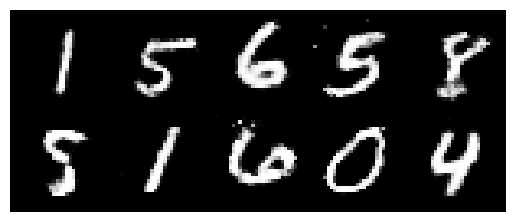

In [21]:
epochs = 150
n_critic = 5

for epoch in range(epochs):
    for i, (real_images, labels) in enumerate(train_loader):
        real_images, labels = real_images.to(device), labels.to(device)

        # Train the discriminator multiple times
        d_loss = 0
        for _ in range(n_critic):
            optimizer_d.zero_grad()
            real_validity = discriminator(real_images, labels)
            real_loss = criterion(real_validity, torch.ones(real_images.size(0), 1).to(device))

            noise = torch.randn(real_images.size(0), latent_dim).to(device)
            fake_labels = torch.randint(0, 10, (real_images.size(0),)).to(device)
            fake_images = generator(noise, fake_labels)
            fake_validity = discriminator(fake_images.detach(), fake_labels)
            fake_loss = criterion(fake_validity, torch.zeros(real_images.size(0), 1).to(device))

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_d.step()

        # Train the generator
        optimizer_g.zero_grad()
        noise = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_labels = torch.randint(0, 10, (real_images.size(0),)).to(device)
        fake_images = generator(noise, fake_labels)
        fake_validity = discriminator(fake_images, fake_labels)
        g_loss = criterion(fake_validity, torch.ones(real_images.size(0), 1).to(device))

        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch + 1}/{epochs}] | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}')

    # Save the model and generated images every 10th epoch
    if (epoch + 1) % 30 == 0:
        save_model(generator, discriminator, epoch + 1)
        generate_and_save_images(generator, epoch + 1, latent_dim)


### Generate images after training

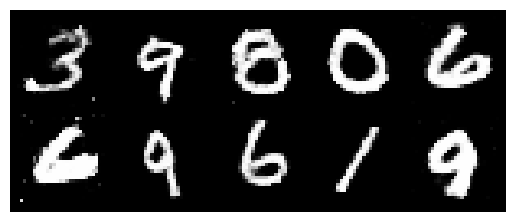

In [22]:

generate_and_save_images(generator, epochs, latent_dim)

# Function to generate an image given a specific label and noise
def generate_image(generator, latent_dim, label):
    generator.eval()
    noise = torch.randn(1, latent_dim).to(device)
    label_tensor = torch.tensor([label]).to(device)
    with torch.no_grad():
        generated_image = generator(noise, label_tensor).cpu()

    plt.imshow(generated_image.view(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

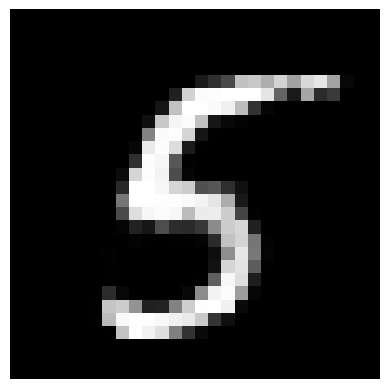

In [23]:
# Example: Generate an image of label 5
generate_image(generator, latent_dim, label=5)